In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/subhashbandaraekanayake/Downloads/DataStrom6.0/damruwan drive/drive-download-20250509T010426Z-001/DataStrom6.0-analyis/train_storming_round.csv')  

In [3]:
agent_perf = df.groupby('agent_code').agg({
    'new_policy_count': 'sum',
    'ANBP_value': 'sum',
    'net_income': 'sum',
    'number_of_policy_holders': 'mean',
    'number_of_cash_payment_policies': 'sum'
}).reset_index()

In [4]:
features = ['new_policy_count', 'ANBP_value', 'net_income',
            'number_of_policy_holders', 'number_of_cash_payment_policies']

In [5]:
scaler = StandardScaler()
agent_perf_scaled = scaler.fit_transform(agent_perf[features])

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
agent_perf['performance_cluster'] = kmeans.fit_predict(agent_perf_scaled)

In [7]:
silhouette = silhouette_score(agent_perf_scaled, agent_perf['performance_cluster'])
print(f"Silhouette Score: {silhouette:.2f}")

Silhouette Score: 0.54


In [8]:
cluster_means = agent_perf.groupby('performance_cluster')[features].mean()
print(cluster_means)

                     new_policy_count    ANBP_value    net_income  \
performance_cluster                                                 
0                          399.737288  2.026466e+07  4.504555e+06   
1                          133.273973  6.922186e+06  1.576181e+06   
2                          141.532258  6.799768e+06  1.504611e+06   

                     number_of_policy_holders  number_of_cash_payment_policies  
performance_cluster                                                             
0                                   30.950960                      1995.680791  
1                                   43.519568                       657.095890  
2                                   23.983450                       709.411290  


In [9]:
cluster_map = {
    cluster_means['new_policy_count'].idxmax(): 'High',
    cluster_means['new_policy_count'].idxmin(): 'Low'
}

for i in range(3):
    if i not in cluster_map:
        cluster_map[i] = 'Medium'

In [10]:
agent_perf['performance_level'] = agent_perf['performance_cluster'].map(cluster_map)

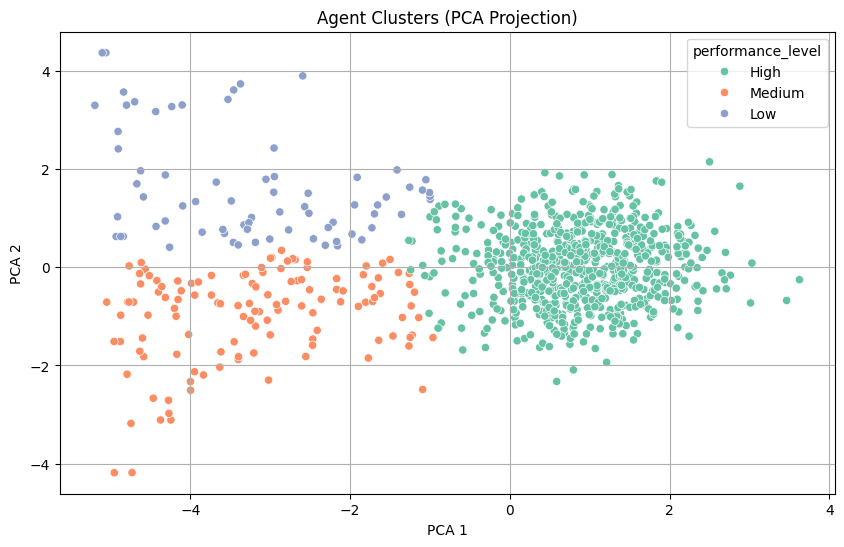

In [12]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(agent_perf_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1],
                hue=agent_perf['performance_level'], palette='Set2')
plt.title('Agent Clusters (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

In [13]:
recommendations = {
    'High': 'Offer bonuses, leadership tracks',
    'Medium': 'Provide skill development programs',
    'Low': 'Assign mentors and structured training'
}

agent_perf['recommendation'] = agent_perf['performance_level'].map(recommendations)